<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [211]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [5]:
os.getcwd()

'C:\\Users\\jleeb\\Desktop\\ga_projects_oct'

In [8]:
movies = pd.read_csv('C:\\Users\\jleeb\\Desktop\\ga_projects_oct\\data\\imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [11]:
# Answer:  There are 979 rows and 6 columns.  This matches a review of the actual csv file with 979 rows.
movies.shape

(979, 6)

#### Check the data type of each column.

In [13]:
# Answer: See below. star_rating= float  title, content_rating, genre= object  duration= integer  actors_list= oject
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [177]:
movies.dtypes


star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
hours             float64
dtype: object

#### Calculate the average movie duration.

In [285]:
# Answer:  The average movie duration is approx 121 minutes.
movies.describe()

,star_rating,duration,hours
count,979.000000,979.000000,979.000000
mean,7.889785,120.979571,2.016326
std,0.336069,26.218010,0.436967
min,7.400000,64.000000,1.066667
25%,7.600000,102.000000,1.700000
50%,7.800000,117.000000,1.950000
75%,8.100000,134.000000,2.233333
max,9.300000,242.000000,4.033333


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [289]:
# Answer: See result below. The shortest movie is 'Freaks'.  The longest movie is 'Hamlet'.
movies.sort_values('duration').head(1)


,star_rating,title,content_rating,genre,duration,actors_list,hours
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...",1.066667


In [288]:
movies.sort_values('duration').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list,hours
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere...",4.033333


#### Create a histogram of duration, choosing an "appropriate" number of bins.

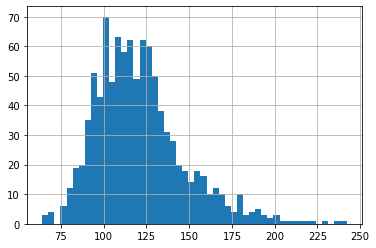

In [24]:
# Answer: see below
movies['duration'].hist(bins=50)

#### Use a box plot to display that same data.

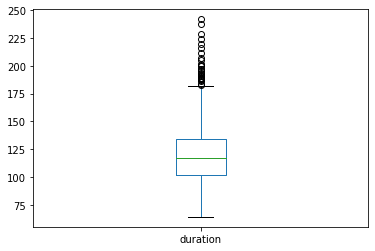

In [49]:
# Answer:
movies.boxplot(column=['duration'], grid =False)
plt.show()

## Intermediate level

#### Count how many movies have each of the content ratings.

In [62]:
# Answer:
movies['content_rating'].value_counts().to_frame()

,content_rating
R,460
PG-13,189
PG,123
NOT RATED,65
APPROVED,47
UNRATED,38
G,32
PASSED,7
NC-17,7
X,4


#### Use a visualization to display that same data, including a title and x and y labels.

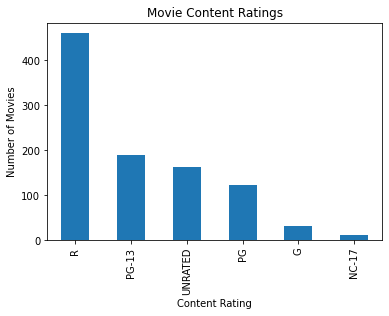

In [290]:
# Answer:
movies['content_rating'].value_counts().plot(kind='bar',title='Movie Content Ratings');
plt.xlabel('Content Rating');
plt.ylabel('Number of Movies');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [79]:
# Answer:
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], ['UNRATED', 'UNRATED', 'UNRATED', 'UNRATED'],inplace=True)
movies['content_rating'].value_counts().to_frame()

,content_rating
R,460
PG-13,189
UNRATED,160
PG,123
G,32
NC-17,7
X,4
TV-MA,1


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [80]:
# Answer:
movies.content_rating.replace(['X', 'TV-MA'], ['NC-17', 'NC-17'],inplace=True)
movies['content_rating'].value_counts().to_frame()

,content_rating
R,460
PG-13,189
UNRATED,160
PG,123
G,32
NC-17,12


#### Count the number of missing values in each column.

In [81]:
# Answer:  there are 3 missing values under the content_rating column
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [98]:
# Answer:  there are 3 missing values under the content_rating column
print((movies.isnull().sum()))

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [99]:
# Answer:
movies["content_rating"].fillna("UNRATED", inplace = True) 
print((movies.isnull().sum()))

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64


In [100]:
# validation UNRATED count is now 163 after renaming blanks 
movies['content_rating'].value_counts().to_frame()

,content_rating
R,460
PG-13,189
UNRATED,163
PG,123
G,32
NC-17,12


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [132]:
# Answer: see below.  the star_rating is higher for movies >= 2 hours

movies['hours'] = movies['duration']/60

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,hours
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",2.366667
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",2.916667
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",3.333333
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",2.533333
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",2.566667


In [152]:
print(movies[movies.hours >= 2].star_rating.mean())
print(movies[movies.hours < 2].star_rating.mean())

7.948898678414082
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

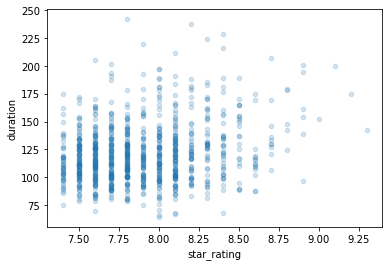

In [159]:
# Answer:
movies.plot(kind='scatter', x='star_rating', y='duration', alpha=0.2)
plt.show()


#### Calculate the average duration for each genre.

In [192]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

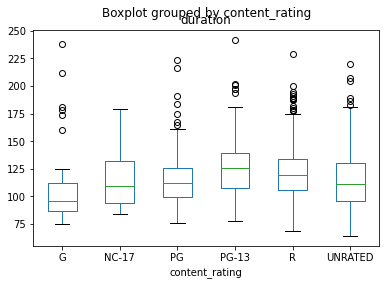

In [164]:
movies.boxplot(column='duration', by='content_rating', grid=False)
plt.show()

#### Determine the top rated movie (by star rating) for each genre.

In [183]:
# Answer: see below
print(movies.sort_values('star_rating', ascending=False).groupby('genre').title.first().to_frame())
movies.groupby('genre').star_rating.max().to_frame()

                                                   title
genre                                                   
Action                                   The Dark Knight
Adventure  The Lord of the Rings: The Return of the King
Animation                                  Spirited Away
Biography                               Schindler's List
Comedy                                      Modern Times
Crime                           The Shawshank Redemption
Drama                                       12 Angry Men
Family                        E.T. the Extra-Terrestrial
Fantasy                        The City of Lost Children
Film-Noir                                  The Third Man
History                              Battleship Potemkin
Horror                                            Psycho
Mystery                                      Rear Window
Sci-Fi                                      Blade Runner
Thriller                               Shadow of a Doubt
Western                   The G

,star_rating
genre,
Action,9.0
Adventure,8.9
Animation,8.6
Biography,8.9
Comedy,8.6
Crime,9.3
Drama,8.9
Family,7.9
Fantasy,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [194]:
# Answer: There were four movies with duplicate titles; however based on other criteria in data frame, they are all different.
multi_titles = movies[movies.title.duplicated()].title
movies[movies.title.isin(multi_titles)]

,star_rating,title,content_rating,genre,duration,actors_list,hours
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",2.633333
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",2.533333
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",1.833333
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",2.633333
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",1.416667
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",2.133333
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",2.233333
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",2.133333


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [193]:
# Answer:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [198]:
top_genres = ['Drama','Comedy','Action','Crime','Biograpy','Adventure','Animation','Horror','Mystery']
movies[movies.genre.isin(top_genres)].groupby('genre').star_rating.mean()              

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [265]:
# Answer:
top_genres2 = movies.genre.value_counts()[movies.genre.value_counts() > 10].index
movies[movies.genre.isin(top_genres2)].groupby('genre').star_rating.mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [268]:
# Answer:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() > 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [283]:
# Answer:
top_genres3 = movies.groupby('genre').star_rating.mean().agg(['count','mean'])
top_genres3[top_genres3['count']>10]

7.9035887972352565

## Bonus

#### Figure out something "interesting" using the actors data!

In [363]:
#cleaning of actor list which contained random characters within the names of the actors
def edit_list(string):
     return string.replace("xef","i").replace("xe4", "a").replace("xfc", "u").replace("xd4", "oh").replace("xe8","l").replace("xed","i").replace("xe7","c").replace("xe9","e").replace("xf3","o").replace("xf6","").replace("xf4","o").replace('u',"u").replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]

In [419]:
#application of the edit_list function created above throughout a new dataframe named Movies_starred
movies_starred= movies['actors_list'].apply(edit_list)

In [421]:
#creating a list of the actors separated
actors_list2 = []
for movie_actors in movies_starred:
    actors_list2.append([x.strip() for x in movie_actors.split(',')])

In [422]:
#a review of the newly created list
actors_list2

[['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'],
 ['Marlon Brando', 'Al Pacino', 'James Caan'],
 ['Al Pacino', 'Robert De Niro', 'Robert Duvall'],
 ['Christian Bale', 'Heath Ledger', 'Aaron Eckhart'],
 ['John Travolta', 'Uma Thurman', 'Samuel L. Jackson'],
 ['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam'],
 ['Clint Eastwood', 'Eli Wallach', 'Lee Van Cleef'],
 ['Elijah Wood', 'Viggo Mortensen', 'Ian McKellen'],
 ['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley'],
 ['Brad Pitt', 'Edward Norton', 'Helena Bonham Carter'],
 ['Elijah Wood', 'Ian McKellen', 'Orlando Bloom'],
 ['Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Ellen Page'],
 ['Mark Hamill', 'Harrison Ford', 'Carrie Fisher'],
 ['Tom Hanks', 'Robin Wright', 'Gary Sinise'],
 ['Elijah Wood', 'Ian McKellen', 'Viggo Mortensen'],
 ['Matthew McConaughey', 'Anne Hathaway', 'Jessica Chastain'],
 ['Jack Nicholson', 'Louise Fletcher', 'Michael Berryman'],
 ['Toshir\\o Mifune', 'Takashi Shimura', 'Keiko Tsushima'],
 ['Robert De Niro', 'Ray Liott

In [423]:
#creation of a dictionary of the actors and the number of movies in which they starred
actor_dict = {}
for actor in actors_list2:
    for a in actor:
        if a in actor_dict:
            actor_dict[a] +=1
        else:
            actor_dict[a] = 1

In [424]:
#a review of the newly created dictionary
actor_dict

{'Tim Robbins': 5,
 'Morgan Freeman': 8,
 'Bob Gunton': 1,
 'Marlon Brando': 4,
 'Al Pacino': 13,
 'James Caan': 2,
 'Robert De Niro': 18,
 'Robert Duvall': 7,
 'Christian Bale': 11,
 'Heath Ledger': 2,
 'Aaron Eckhart': 2,
 'John Travolta': 1,
 'Uma Thurman': 5,
 'Samuel L. Jackson': 6,
 'Henry Fonda': 3,
 'Lee J. Cobb': 2,
 'Martin Balsam': 1,
 'Clint Eastwood': 14,
 'Eli Wallach': 1,
 'Lee Van Cleef': 2,
 'Elijah Wood': 5,
 'Viggo Mortensen': 4,
 'Ian McKellen': 8,
 'Liam Neeson': 5,
 'Ralph Fiennes': 7,
 'Ben Kingsley': 4,
 'Brad Pitt': 14,
 'Edward Norton': 7,
 'Helena Bonham Carter': 4,
 'Orlando Bloom': 2,
 'Leonardo DiCaprio': 11,
 'Joseph Gordon-Levitt': 6,
 'Ellen Page': 2,
 'Mark Hamill': 3,
 'Harrison Ford': 10,
 'Carrie Fisher': 4,
 'Tom Hanks': 14,
 'Robin Wright': 3,
 'Gary Sinise': 2,
 'Matthew McConaughey': 4,
 'Anne Hathaway': 3,
 'Jessica Chastain': 3,
 'Jack Nicholson': 9,
 'Louise Fletcher': 1,
 'Michael Berryman': 1,
 'Toshir\\o Mifune': 3,
 'Takashi Shimura': 2,


In [425]:
#a printout of the dictionary sorted by key
print({key: value for key, value in sorted(actor_dict.items(), key=lambda item: item[1])})

{'Bob Gunton': 1, 'John Travolta': 1, 'Martin Balsam': 1, 'Eli Wallach': 1, 'Louise Fletcher': 1, 'Michael Berryman': 1, 'Keiko Tsushima': 1, 'Alexandre Rodrigues': 1, 'Matheus Nachtergaele': 1, 'Leandro Firmino': 1, 'Donna Reed': 1, 'Lionel Barrymore': 1, 'Nicoletta Braschi': 1, 'Giorgio Cantarini': 1, 'Lawrence A. Bonney': 1, 'Virginia Cherrill': 1, 'Florence Lee': 1, 'Daveigh Chase': 1, 'Miyu Irino': 1, 'Omar Sy': 1, 'Anne Le Ny': 1, 'Paul Henreid': 1, 'Miles Teller': 1, 'J.K. Simmons': 1, 'Melissa Benoist': 1, 'u"Beverly D\'Angelo': 1, 'Henry Bergman': 1, 'Paul Freeman': 1, 'Wendell Corey': 1, 'Anthony Perkins': 1, 'Michael Clarke Duncan': 1, 'Gloria Swanson': 1, 'Erich von Stroheim': 1, 'Thomas Kretschmann': 1, 'Frank Finlay': 1, 'Connie Nielsen': 1, 'Darsheel Safary': 1, 'Tanay Chheda': 1, 'Philippe Noiret': 1, 'Enzo Cannavale': 1, 'Antonella Attili': 1, 'Jack Oakie': 1, 'Martina Gedeck': 1, 'Ralph Meeker': 1, 'Adolphe Menj': 1, 'Christoph Waltz': 1, 'Madhavan': 1, 'Mona Singh': 

In [427]:
#FINAL ANSWER!!!
#determing the actor that starred in the most movies
max_value = max(actor_dict.values()) 
max_keys = [k for k, v in actor_dict.items() if v == max_value] 

print(max_keys, "was the actor that starred in the most movies with a total of", max_value,"!!!")

['Robert De Niro'] was the actor that starred in the most movies with a total of 18 !!!
